Importing  all  required  Modules

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import  GridSearchCV Not Used as already fetched Optimal Parameters
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix




Loading the Kaggle Creditcard_Fraud_DataSet

In [2]:
# Load the dataset
Data=pd.read_csv('creditcard_2023.csv')

df=Data['Class'].value_counts()
df
print(Data.shape)
Data.head()

(568630, 31)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


Data_Visiualisation

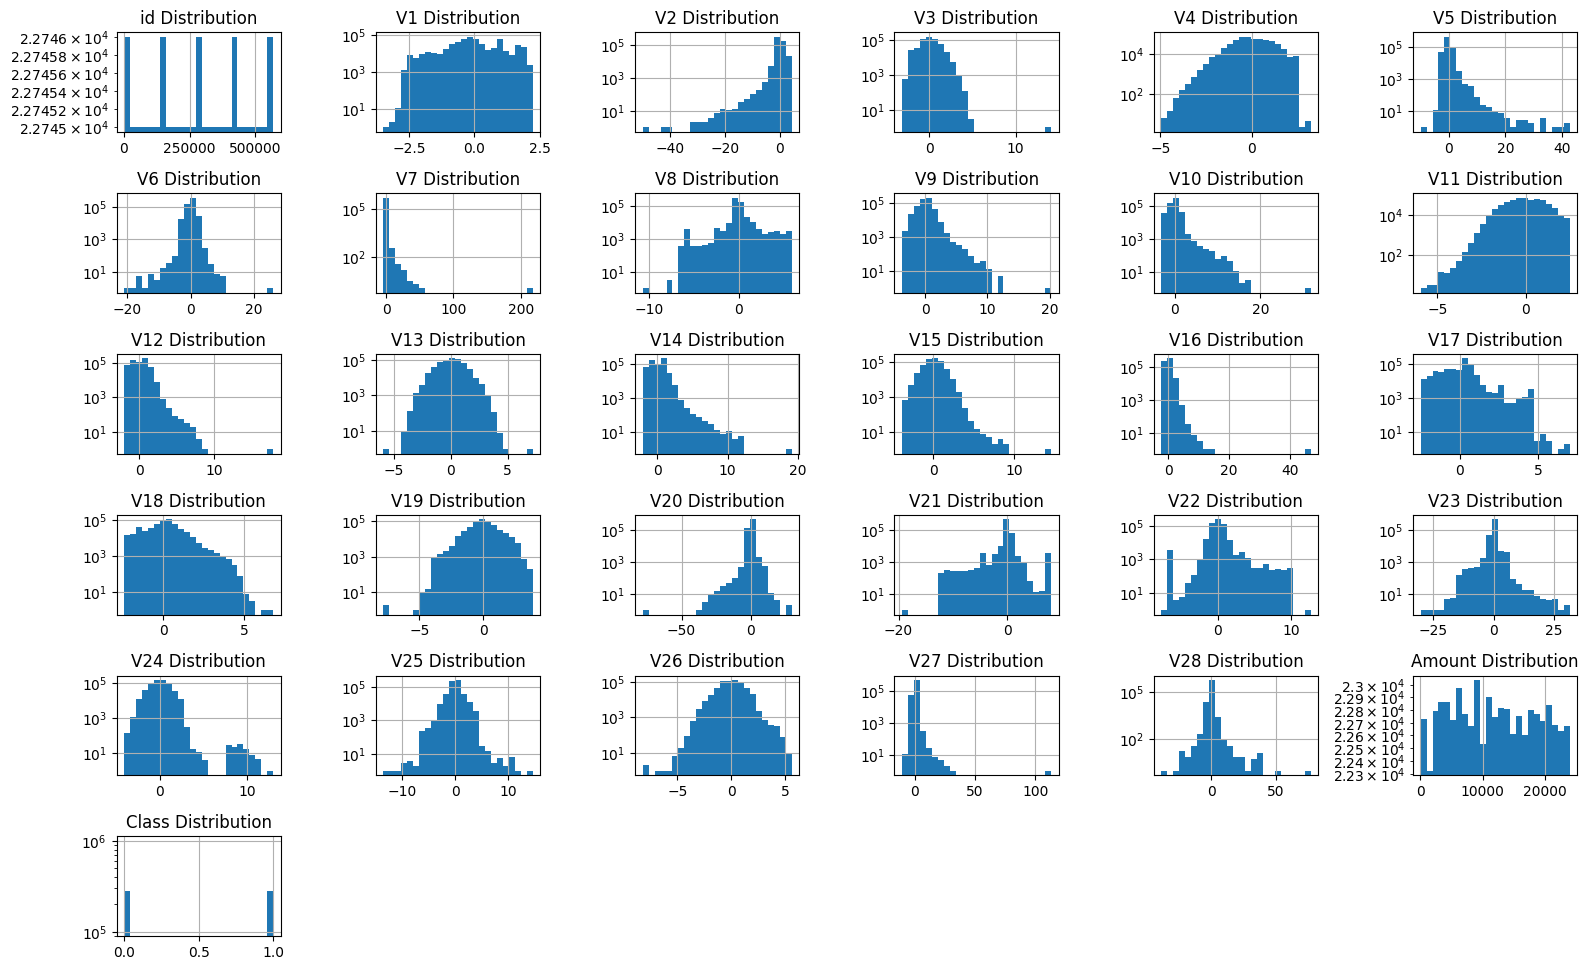

In [39]:
fig = plt.figure(figsize=(16,16))
for i, ax in enumerate(Data.columns):
    ax = fig.add_subplot(10,6,i+1)
    Data.iloc[:,i].hist(bins = 25)
    ax.set_title(Data.columns[i]+" Distribution")
    ax.set_yscale('log')
fig.tight_layout()
plt.show()

In [5]:

X=Data.drop('id',axis=1)
X=X.drop('Class',axis=1)


y=Data['Class']
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97


Checking  For  Optimum Features  to  retain Maximum Accuracy

In [9]:
model = RandomForestClassifier(random_state=42,n_jobs=-1)

In [10]:
#Using REFECV to select the best features for the model
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=StratifiedKFold(5),
    scoring='accuracy',n_jobs=-1
)

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
rfecv.fit(X_scaled, y)
optimal_num_features = rfecv.n_features_

In [47]:
print(f"Optimal number of features: {optimal_num_features}")


Optimal number of features: 25


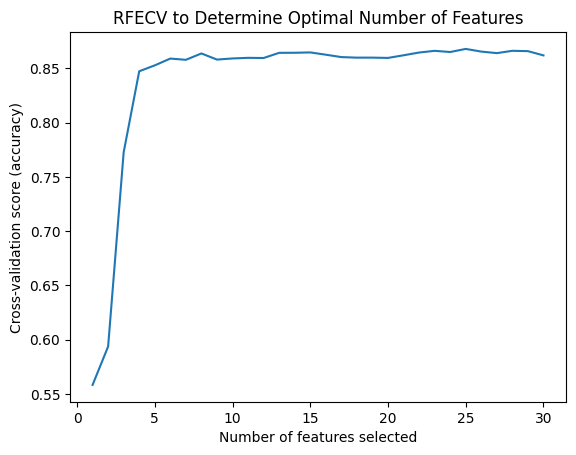

In [34]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.title("RFECV to Determine Optimal Number of Features")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

From the Above Plot we can Clearly see that at around 14 Best Features we can get Optimal Accuracy

In [12]:
pipeline=Pipeline([('scalar',StandardScaler()),('fs',SelectKBest(k=20)),('pca',PCA(n_components=14))])

In [13]:
X_reduced=pipeline.fit_transform(X,y)
X_reduced=pd.DataFrame(X_reduced)
X_reduced.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2.123835,0.860451,0.209821,-0.202858,-0.499953,0.188667,0.290237,-1.036116,0.450184,0.112187,0.408320,1.559371,0.114238,-0.449992
1,2.074967,-0.121154,-0.076893,-0.059047,-0.478630,-0.269190,-0.296337,0.568657,-0.030274,-0.176296,-0.341949,0.406382,-0.138071,0.795462
2,2.254087,-0.455159,-1.072637,-0.084933,-1.224035,-0.281009,0.549760,-1.192725,0.086334,-1.759561,0.689425,0.839105,-0.247850,0.326659
3,2.725368,-0.890544,-0.745236,-0.463615,-1.365097,-0.850654,-0.321457,-1.136692,0.606643,-0.529175,0.047425,0.652466,-0.946868,-0.136314
4,2.134771,1.041912,0.452421,-0.068320,-0.609197,0.077784,0.324848,-0.589412,0.215165,0.617399,0.364311,0.701104,0.227173,-0.481907


Selecting RandomForestClassifier With Optimal Hyperparameters /Here im Not Performing GridSearchCV as already with my trial model i was getting 99.9X %accuracy which i was quite satisfied with.

In [14]:
rf=RandomForestClassifier(n_estimators=500,random_state=42,n_jobs=-1)



Splitting the Data for test and train in Stratified Manner to ensure the case of class imbalance


In [15]:
# Initialize StratifiedKFold with the number of folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Perform training and testing for each split
    # Initialize an empty list to store the results
results = []

    # Iterate over the splits
for train_index, test_index in skf.split(X_reduced.values, y):
    X_train, X_test = X_reduced.values[train_index], X_reduced.values[test_index]
    y_train, y_test = y[train_index], y[test_index]
        
        # Train the model
    rf.fit(X_train, y_train)
        
        # Predict on the test data
    y_pred = rf.predict(X_test)
        
        # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
        
        # Store the results in a dictionary
    result = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'roc_auc': roc_auc
    }
        
        # Append the result to the list
    results.append(result)

    # Combine the results into a DataFrame
results_df = pd.DataFrame(results)

    



Fetching the Results

In [16]:
# Calculate the mean of the evaluation metrics
results_df.mean()

accuracy     0.999808
precision    0.999617
recall       1.000000
f1           0.999808
roc_auc      0.999808
dtype: float64

Plot to Showcase the correlation factors of different Features

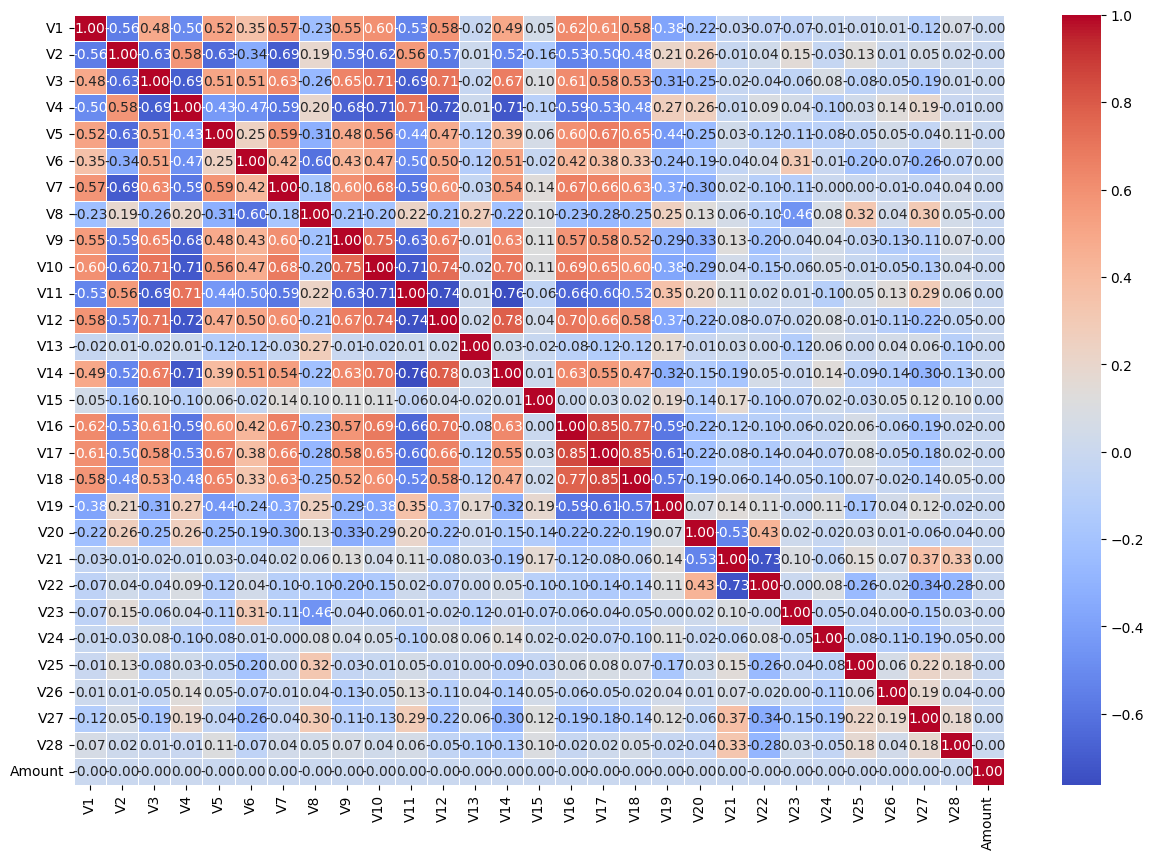

In [17]:
import seaborn as sns
corr_matrix = X.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()


Here we can see that, Upto V1-V18 the correlation factor is quite strong, thus they are the most important features for dimensionality reduction.


In [18]:
def generate_query_point():
    query_point = np.random.rand(1, 29)  # Generate random values between 0 and 1
    return query_point


In [25]:
query_point = generate_query_point().reshape(1, -1)

query_point_scaled = pipeline.transform(query_point)
prediction = rf.predict(query_point_scaled)
prediction 

c:\Program Installation\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

Fetching Confusion Metrix to Further Fetch the information about Variance of the data

In [33]:
X_For_Testing, drop_1, y_For_Testing, drop_2 = train_test_split(X_reduced, y, test_size=0.2, random_state=41, stratify=y)

In [34]:
conf_matrix_rf = confusion_matrix(y_For_Testing,rf.predict(X_For_Testing))

<Axes: >

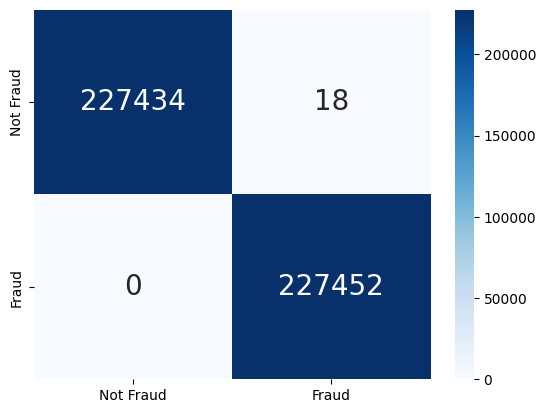

In [36]:
sns.heatmap(conf_matrix_rf,annot=True,fmt='d',cmap="Blues",annot_kws={"size": 20},
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])

In [42]:
import joblib

# Save the model
joblib.dump(rf, 'model.joblib')

# Save the pipeline
joblib.dump(pipeline, 'pipeline.joblib')

['pipeline.joblib']

In conclusion, this project utilized various machine learning techniques, including a Decision Tree Classifier and Random Forest Classifier, to analyze a dataset and predict fraudulent credit card transactions. The dataset was preprocessed, features were selected using Recursive Feature Elimination with Cross-Validation (RFECV), and the data features were reduced to optimum. The models were evaluated using accuracy and confusion matrix, and achieved a high accuracy of 99.98%. Overall, this project successfully demonstrated the effectiveness of machine learning in detecting and preventing credit card fraud.